# BatchGD

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [256]:
data=pd.read_csv("MultipleLR.csv")

In [257]:
data.shape

(24, 4)

In [258]:
data

,73,80,75,152
0,93,88,93,185
1,89,91,90,180
2,96,98,100,196
3,73,66,70,142
4,53,46,55,101
5,69,74,77,149
6,47,56,60,115
7,87,79,90,175
8,79,70,88,164
9,69,70,73,141


In [259]:
data=data.values

In [260]:
Y=data[:,-1]
Y=Y.reshape(24,1)

In [261]:
x0=np.ones((data.shape[0],1))
x0.shape

(24, 1)

In [262]:
x=data[:,: -1]
x[:,0].shape

(24,)

In [367]:
X=np.concatenate((x0,x),axis=1)
X.shape

(24, 4)

In [368]:
def batch_GD(iterations,alpha,X,Y):
    m=X.shape[0]
    n=X.shape[1]
    thetas=np.zeros((n,1))
    cost_list=[]
    theta_list=[]
    for i in range(iterations):
        h=np.dot(X,thetas).reshape(m,1)
        error=h-Y
        cost=(1/(2*m))*np.dot(error.T,error)
        cost_list.append(cost.item())
        theta_list.append(thetas)
        gradient=(1/m)*np.dot(X.T,error).reshape(n,1)
        thetas=thetas-gradient*alpha
        if(np.linalg.norm(gradient)<5):
            print("stopped at {} iteration".format(i))
            break
            
    return cost_list,theta_list

In [369]:
c,t=batch_GD(1000,0.0001,X,Y)

stopped at 377 iteration


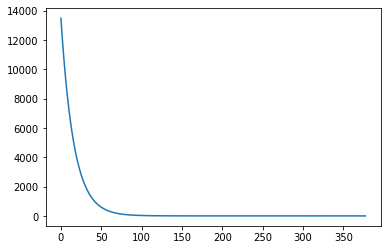

In [370]:
plt.plot(c)

In [371]:
x_gen=np.linspace(0,20,30)
y_gen=-2*x_gen+1

In [372]:
x_gen.shape[0]

30

# Stocastic GD

In [373]:
def stochastic(X,y,alpha,iterations,threshold):
    m=X.shape[0]
    theta0=0
    theta1=0
    theta0_list=[]
    theta1_list=[]
    cost_list=[]
    for i in range(iterations):
        for j in range(m):
            hypothesis=theta0+theta1*X[j]
            error=hypothesis-y[j]
    
            theta0_list.append(theta0)
            theta1_list.append(theta1)
            cost=(1/2)*(np.square(error))
            cost_list.append(cost)
   
            gradient0=error
            gradient1=error*X[j]
            theta0=theta0-alpha*gradient0
            theta1=theta1-alpha*gradient1
            
        if(abs(cost_list[i*m]-cost_list[(i-1)*m])<threshold and i>0):
            print(i)
            break
            
    return cost_list,theta0_list,theta1_list
            

In [374]:
###shuffle  data
from sklearn.utils import shuffle
x_shuffled, y_shuffled = shuffle(x_gen, y_gen)

In [375]:
cost_list,theta0_list,theta1_list=stochastic(x_shuffled,y_shuffled,0.001,1000,0.0001)

3


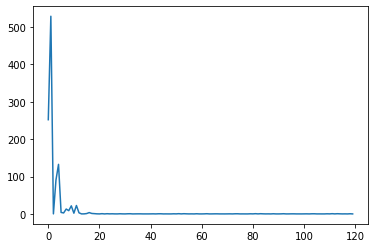

In [376]:
plt.plot(cost_list)

# Mini Batch

In [377]:
from sklearn.utils import shuffle
x_shuffled, y_shuffled = shuffle(X, Y)

In [378]:
def generate_batches(X,y,batch_size):
    for i in range(0,len(X),batch_size):
        yield X[: batch_size,:],y[: batch_size,:]
        

In [379]:
def mini_batch_vectorized(X,y,iterations,threshold,batch_size,alpha):
    n=X.shape[1]
    m=X.shape[0]
    cost_list=[]
    theta_list=[]
    no_of_batches=int(np.ceil(m/batch_size))
    theta=np.zeros((n,1))
    for i in range(iterations):
        for x_batch,y_batch in generate_batches(X,y,batch_size):
            hypothesis=np.dot(x_batch,theta).reshape(batch_size,1)
            error=hypothesis-y_batch
            cost=(1/2*(batch_size))*np.dot(error.T,error).reshape(1,1)
            cost_list.append(cost.item())
            theta_list.append(theta)
            gradient=(1/(batch_size))*np.dot(error.T,x_batch).reshape(n,1)
            theta=theta-alpha*gradient
        if(abs(cost_list[i*no_of_batches]-cost_list[(i-1)*no_of_batches])<threshold and i>0):
            print(i)
            break
    return cost_list,theta_list
        

    

In [380]:
cost_list,theta_list=mini_batch_vectorized(x_shuffled,y_shuffled,1000,5,5,0.00001)

6


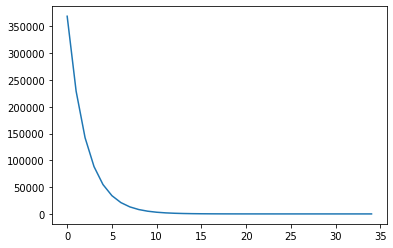

In [381]:
plt.plot(cost_list)

In [382]:
theta0=[]
theta1=[]
theta2=[]
for item in theta_list:
    theta0.append(item[1])
   # theta1.append(item[1])
   # theta2.append(item[2])
    

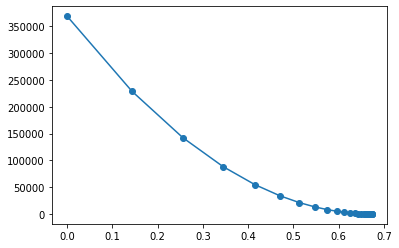

In [383]:
plt.plot(theta0,cost_list,'-o')

# Batch+Momentum 

In [384]:
def batch_GD_momentum(iterations,alpha,gamma,X,Y):
    m=X.shape[0]
    n=X.shape[1]
    mt=np.zeros((n,1))
    thetas=np.zeros((n,1))
    cost_list=[]
    theta_list=[]
    for i in range(iterations):
        h=np.dot(X,thetas).reshape(m,1)
        error=h-Y
        cost=(1/(2*m))*np.dot(error.T,error)
        cost_list.append(cost.item())
        theta_list.append(thetas)
        gradient=(1/m)*np.dot(X.T,error).reshape(n,1)
        mt=gamma*mt+alpha*gradient
        thetas=thetas-mt
        if(np.linalg.norm(gradient)<10):
            print("stopped at {} iteration".format(i))
            break
        if(abs(cost_list[i]-cost_list[i-1])<0.001 and i>0):
            print(i)
            break
            
    return cost_list,theta_list

In [385]:
c,t=batch_GD_momentum(1000,0.000001,0.9,X,Y)

117


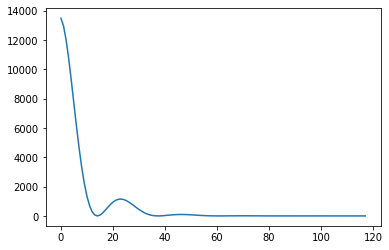

In [386]:
plt.plot(c)

In [387]:
theta0=[]
theta1=[]
theta2=[]
for item in t:
    theta0.append(item[1])
   # theta1.append(item[1])
   # theta2.append(item[2])

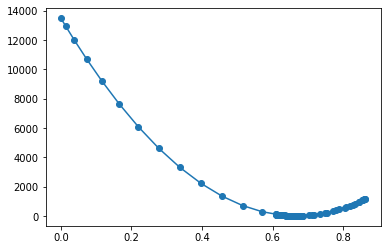

In [388]:
plt.plot(theta0,c,'-o')

# Mini+Momentum

In [389]:
def mini_batch_vectorized_momentum(X,y,iterations,threshold,batch_size,alpha,gamma):
    n=X.shape[1]
    m=X.shape[0]
    mt=np.zeros((n,1))
    cost_list=[]
    theta_list=[]
    no_of_batches=int(np.ceil(m/batch_size))
    theta=np.zeros((n,1))
    for i in range(iterations):
        for x_batch,y_batch in generate_batches(X,y,batch_size):
            hypothesis=np.dot(x_batch,theta).reshape(batch_size,1)
            error=hypothesis-y_batch
            cost=(1/2*(batch_size))*np.dot(error.T,error).reshape(1,1)
            cost_list.append(cost.item())
            theta_list.append(theta)
            gradient=(1/(batch_size))*np.dot(error.T,x_batch).reshape(n,1)
            mt=gamma*mt+alpha*gradient
            theta=theta-mt
        if(abs(cost_list[i*no_of_batches]-cost_list[(i-1)*no_of_batches])<threshold and i>0):
            print(i)
            break
    return cost_list,theta_list
        


In [390]:
cost_list,theta_list=mini_batch_vectorized_momentum(x_shuffled,y_shuffled,1000,5,5,0.000001,0.9)

21


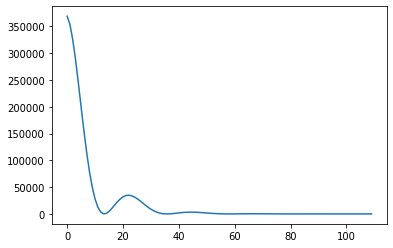

In [391]:
plt.plot(cost_list)

In [392]:
theta0=[]
theta1=[]
theta2=[]
for item in theta_list:
    theta0.append(item[1])
   # theta1.append(item[1])
   # theta2.append(item[2])
    

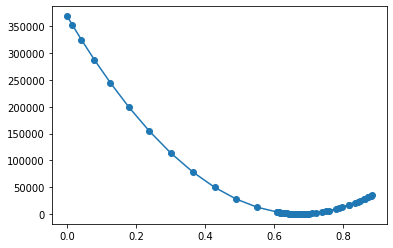

In [393]:
plt.plot(theta0,cost_list,'-o')

# Nestrov+Batch

In [394]:
def batch_GD(iterations,alpha,gamma,X,Y,threshold):
    m=X.shape[0]
    n=X.shape[1]
    thetas=np.zeros((n,1))
    thetas_temp=np.zeros((n,1))
    mt=np.zeros((n,1))
    cost_list=[]
    theta_list=[]
    for i in range(iterations):
        h=np.dot(X,thetas).reshape(m,1) ##cal hypothesis
        error=h-Y #cal error
        cost=(1/(2*m))*np.dot(error.T,error) #cal cost
        
        hypothesis_temp=np.dot(X,thetas_temp).reshape(m,1) #hyopthesis for theta temp
        error_temp=hypothesis_temp-Y #error for theta temp
        thetas_temp=thetas-gamma*mt #cal thetas_temp
        gradient_thetas_temp=(1/m)*np.dot(error_temp.T,X).reshape(n,1) #cal gradient theta temp
        thetas=thetas_temp-alpha*gradient_thetas_temp #update theta
        mt=gamma*mt+alpha*gradient_thetas_temp #update mt
        
        theta_list.append(thetas)
        cost_list.append(cost.item())
        if(np.abs(cost_list[i]-cost_list[i-1]<threshold and i>0)):
            print("stopped at {} iteration".format(i))
            break
            
    return cost_list,theta_list

In [395]:
c,t=batch_GD(1000,0.00015,0.8,X,Y,0.00001)

stopped at 3 iteration


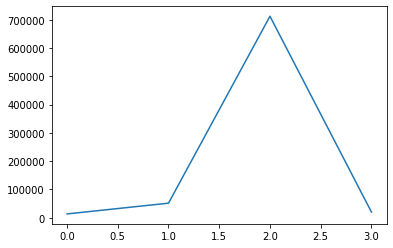

In [396]:
plt.plot(c)

# Batch+AdaGrad

In [397]:
def batch_GD_adagrad(iterations,alpha,X,Y):
    m=X.shape[0]
    n=X.shape[1]
    thetas=np.zeros((n,1))
    vt=np.zeros((n,1))
    eps=0.00001
    cost_list=[]
    theta_list=[]
    for i in range(iterations):
        h=np.dot(X,thetas).reshape(m,1)
        error=h-Y
        cost=(1/(2*m))*np.dot(error.T,error)
        theta_list.append(thetas)
        cost_list.append(cost.item())
        gradient=(1/m)*np.dot(X.T,error).reshape(n,1)
        vt=vt+gradient**2
        thetas=thetas-gradient*(alpha/np.sqrt(vt+eps))
        if(abs(cost_list[i]-cost_list[i-1])<0.01 and i>0):
              print("stopped at {} iteration".format(i))
              break
            
    return cost_list,theta_list

In [398]:
c,t=batch_GD_adagrad(100,0.1,X,Y)

stopped at 88 iteration


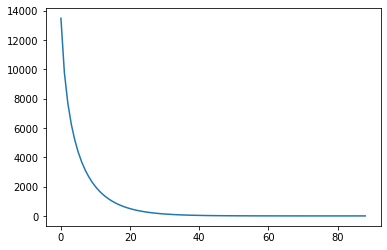

In [399]:
plt.plot(c)

In [400]:
theta0=[]
theta1=[]
theta2=[]
for item in t:
    theta0.append(item[1])
   # theta1.append(item[1])
   # theta2.append(item[2])

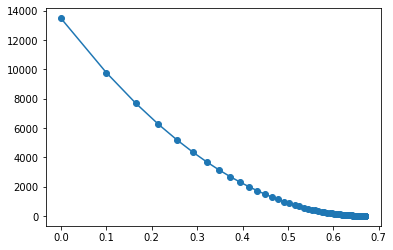

In [401]:
plt.plot(theta0,c,'-o')

# MiniBatch+Adagrad

In [402]:
def mini_batch_vectorized_adagrad(X,y,iterations,threshold,batch_size,alpha):
    n=X.shape[1]
    m=X.shape[0]
    vt=np.zeros((n,1))
    eps=0.0001
    cost_list=[]
    theta_list=[]
    no_of_batches=int(np.ceil(m/batch_size))
    theta=np.zeros((n,1))
    for i in range(iterations):
        for x_batch,y_batch in generate_batches(X,y,batch_size):
            hypothesis=np.dot(x_batch,theta).reshape(batch_size,1)
            error=hypothesis-y_batch
            cost=(1/2*(batch_size))*np.dot(error.T,error).reshape(1,1)
            cost_list.append(cost.item())
            theta_list.append(theta)
            gradient=(1/(batch_size))*np.dot(error.T,x_batch).reshape(n,1)
            vt=vt+gradient**2
            theta=theta-gradient*(alpha/np.sqrt(vt+eps))
        if(abs(cost_list[i*no_of_batches]-cost_list[(i-1)*no_of_batches])<threshold and i>0):
            print(i)
            break
    return cost_list,theta_list
        

    

In [417]:
c,t=mini_batch_vectorized_adagrad(x_shuffled,y_shuffled,1000,5,5,0.01)

655


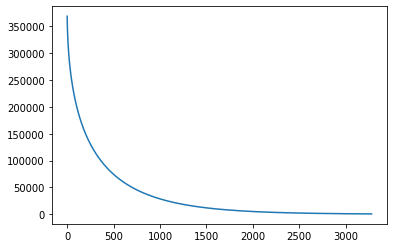

In [418]:
plt.plot(c)

In [419]:
theta0=[]
theta1=[]
theta2=[]
for item in t:
    theta0.append(item[1])
    theta1.append(item[2])
   # theta2.append(item[2])

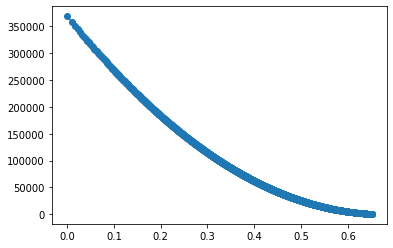

In [420]:
plt.plot(theta1,c,'-o')

In [449]:
teams=['afnan','lauren','bedo','emad','anter','mohand','abdelrahman3','abdallah','yasser']

In [450]:
def del_member():
    for i in x:
        teams.remove(i)

In [ ]:
for i in range(3):
    x=np.random.choice(teams,3,replace=False)
    print(x)
    del_member()
    

# Batch+Rms

In [458]:
def batch_GD_RMS(iterations,alpha,beta,X,Y):
    m=X.shape[0]
    n=X.shape[1]
    thetas=np.zeros((n,1))
    vt=np.zeros((n,1))
    eps=0.00001
    cost_list=[]
    theta_list=[]
    for i in range(iterations):
        h=np.dot(X,thetas).reshape(m,1)
        error=h-Y
        cost=(1/(2*m))*np.dot(error.T,error)
        theta_list.append(thetas)
        cost_list.append(cost.item())
        gradient=(1/m)*np.dot(X.T,error).reshape(n,1)
        vt=beta*vt+(1-beta)*gradient**2
        thetas=thetas-gradient*(alpha/np.sqrt(vt+eps))
        if(abs(cost_list[i]-cost_list[i-1])<0.0001 and i>0):
              print("stopped at {} iteration".format(i))
              break
            
    return cost_list,theta_list

In [481]:
c,t=batch_GD_RMS(1000,0.01,0.9,X,Y)

stopped at 205 iteration


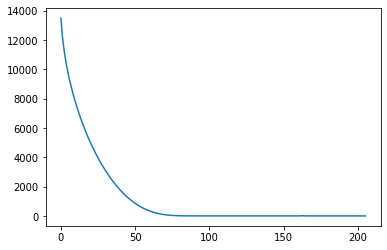

In [482]:
plt.plot(c)

In [483]:
theta0=[]
theta1=[]
theta2=[]
for item in t:
    theta0.append(item[0])
    theta1.append(item[2])
   # theta2.append(item[2])

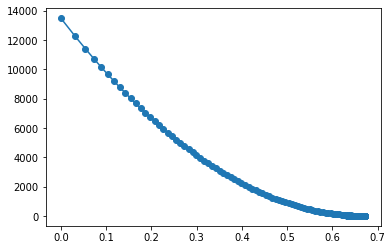

In [484]:
plt.plot(theta0,c,'-o')

# MiniBatch+Rms

In [491]:
def mini_batch_vectorized_RMS(X,y,iterations,threshold,batch_size,alpha,beta):
    n=X.shape[1]
    m=X.shape[0]
    vt=np.zeros((n,1))
    eps=0.0001
    cost_list=[]
    theta_list=[]
    no_of_batches=int(np.ceil(m/batch_size))
    theta=np.zeros((n,1))
    for i in range(iterations):
        for x_batch,y_batch in generate_batches(X,y,batch_size):
            hypothesis=np.dot(x_batch,theta).reshape(batch_size,1)
            error=hypothesis-y_batch
            cost=(1/2*(batch_size))*np.dot(error.T,error).reshape(1,1)
            cost_list.append(cost.item())
            theta_list.append(theta)
            gradient=(1/(batch_size))*np.dot(error.T,x_batch).reshape(n,1)
            vt=beta*vt+(1-beta)*gradient**2
            theta=theta-gradient*(alpha/np.sqrt(vt+eps))
        if(abs(cost_list[i*no_of_batches]-cost_list[(i-1)*no_of_batches])<threshold and i>0):
            print(i)
            break
    return cost_list,theta_list

In [492]:
c,t=mini_batch_vectorized_RMS(x_shuffled,y_shuffled,1000,5,5,0.01,0.9)

20


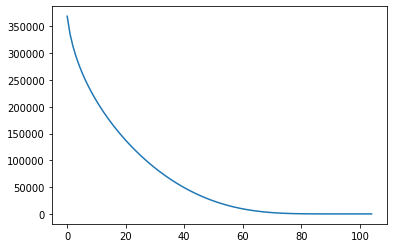

In [493]:
plt.plot(c)

In [494]:
theta0=[]
theta1=[]
theta2=[]
for item in t:
    theta0.append(item[0])
    theta1.append(item[2])
   # theta2.append(item[2])

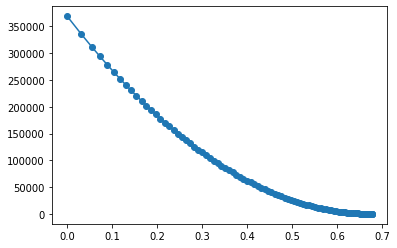

In [495]:
plt.plot(theta0,c,'-o')

# Adam+MiniBatch 

In [502]:
def mini_batch_vectorized_adam(X,y,iterations,threshold,batch_size,alpha,beta1,beta2):
    n=X.shape[1]
    m=X.shape[0]
    vt=np.zeros((n,1))
    mt=np.zeros((n,1))
    eps=0.0001
    cost_list=[]
    theta_list=[]
    no_of_batches=int(np.ceil(m/batch_size))
    theta=np.zeros((n,1))
    for i in range(iterations):
        for x_batch,y_batch in generate_batches(X,y,batch_size):
            hypothesis=np.dot(x_batch,theta).reshape(batch_size,1)
            error=hypothesis-y_batch
            cost=(1/2*(batch_size))*np.dot(error.T,error).reshape(1,1)
            cost_list.append(cost.item())
            theta_list.append(theta)
            gradient=(1/(batch_size))*np.dot(error.T,x_batch).reshape(n,1)
            mt=beta1*mt+(1-beta1)*gradient
            vt=beta2*vt+(1-beta2)*(gradient**2)
            mthat=mt/(1-beta1)
            vthat=vt/(1-beta2)
            theta=theta-mthat*(alpha/np.sqrt(vthat+eps))
        if(abs(cost_list[i*no_of_batches]-cost_list[(i-1)*no_of_batches])<threshold and i>0):
            print(i)
            break
    return cost_list,theta_list

In [503]:
c,t=mini_batch_vectorized_adam(x_shuffled,y_shuffled,1000,5,5,0.001,0.9,0.9)

52


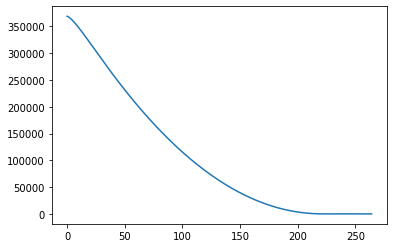

In [504]:
plt.plot(c)

In [505]:
theta0=[]
theta1=[]
theta2=[]
for item in t:
    theta0.append(item[0])
    theta1.append(item[2])
   # theta2.append(item[2])

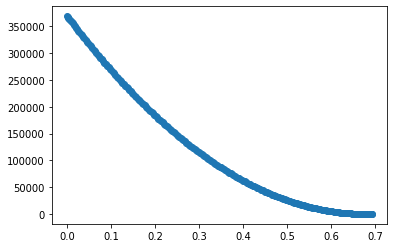

In [506]:
plt.plot(theta0,c,'-o')